# Distinguishing the Virtual From the Real

In this notebook, we evaluate the data of our study "Distinguishing the Virtual From the Real". In the study, participants observed a Mixed Reality (MR) scene through a Meta Quest 3 and were tasked with scoring objects on a scale of 0 to 10 based on how much they believed the objects to be real (0=virtual and 10=real). The time to task completion (TTC) was measured and participants filled out a single ease question (SEQ) and the Slater-Usoh-Steed presence questionnaire (SUS) after the mixed reality experience. The independent variable was what kind of visual cue highlighted virtual objects as virtual. Four conditions were tested in a within-groups design: A floating marker, an outline, transparency and no cue. We start by importing the data.


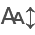

In [1]:
from itables import init_notebook_mode
import pandas as pd

# Make Pandas DataFrames interactive
init_notebook_mode(all_interactive=True)

time_and_scores = pd.read_csv("time_and_scores.csv", delimiter=";")
presence_seq = pd.read_csv("presence_seq.csv", delimiter=";")
data = pd.merge(time_and_scores, presence_seq, on="id")
objects = pd.read_csv("objects.csv", delimiter=";")
latin_square = pd.read_csv("latin_square.csv", delimiter=";")

# "None" is imported as NaN by pandas. Fix this
latin_square.loc[latin_square["highlight"].isnull(), "highlight"] = "None"

## Raw data

The following table shows the raw collected data of the study. `id` is a unique identifier for each participant. `obj3.2` refers to the score a participant gave to the second object (going from left to right) in the third "experiment" (the third condition tested on this user). `time3` is the TTC in seconds measured in the third experiment. `seq2` refers to the participants' answer to the SEQ (a 7-point likert scale going from "very hard" to "very easy") for the second experiment. `p4.6` refers to the participants' answer to the sixth question of the SUS presence questionnaire in the fourth experiment.

In [2]:
data

id  group  obj1.1  obj1.2  obj1.3  obj1.4   time1  obj2.1  obj2.2  obj2.3  \
0    1      1       0       5       2       7   37.04       0      10      10   
1    2      2       5       5       7       9   19.33       0       7      10   
2    3      3       2       3       8       9   29.87       0       0       2   
3    4      4       4       7       6       7   23.73       6       8      10   
4    5      1       0       0       5       0   29.98       0      10      10   
5    6      2       0      10       0      10   14.03       0      10       0   
6    7      3       3       2       4       3   64.93       2       3       3   
7    8      4       4       8       1       7   20.15       4       8       7   
8    9      1       0       0       0       0   36.03       0      10      10   
9   10      2       0      10      10      10   55.53       0      10      10   
10  11      3       1       9       1       9  106.19       8       8       8   
11  12      4       4       7       9       2   40.13      10       0       0   
12  13      1       0      10      10      10   85.92      10      10      10   
13  14      2       3       7       4       6   31.52       0       7       8   
14  15      3      10       1       6       8   25.55       5       7       7   
15  16      4       8       7       7       4   32.47       3       8       7   
16  17      1       6       2       4       2   32.21       1       7       7   
17  18      2       0      10       0      10   12.35       0      10      10   
18  19      3       3       8       4       8   25.17       2       9       9   
19  20      4       0       0       0       7  118.43       0      10      10   

    ...  p3.4  p3.5  p3.6  seq4  p4.1  p4.2  p4.3  p4.4  p4.5  p4.6  
0   ...     2     5     4     7     4     5     3     5     2     6  
1   ...     7     7     7     6     7     7     7     7     7     7  
2   ...     3     5     5     6     4     6     6     3     6     4  
3   ...     2     2     6     7     6     5     5     5     5     6  
4   ...     5     6     3     7     5     3     6     6     6     5  
5   ...     6     6     6     4     5     5     6     6     3     6  
6   ...     6     2     7     2     6     3     2     7     2     7  
7   ...     3     4     7     3     6     6     5     3     5     2  
8   ...     4     1     4     1     1     7     4     4     1     4  
9   ...     4     4     4     4     5     5     4     5     4     4  
10  ...     6     4     2     3     5     2     5     3     2     3  
11  ...     4     1     5     1     5     1     7     4     1     4  
12  ...     4     1     1     4     1     1     1     4     1     1  
13  ...     6     5     6     6     5     6     5     6     5     6  
14  ...     2     6     2     7     7     7     6     1     7     1  
15  ...     5     6     5     7     3     4     5     3     5     5  
16  ...     6     3     2     7     3     2     2     3     3     2  
17  ...     5     4     6     1     5     5     3     3     4     3  
18  ...     4     3     4     1     3     3     2     6     5     5  
19  ...     6     2     3     7     4     1     2     5     2     4  

[20 rows x 50 columns]

### Latin Square

The table below shows information on which condition was tested in which `experiment`, depending on the participants' `group`. 

In [3]:
latin_square

group  experiment     highlight
0       1           1          None
1       1           2       Outline
2       1           3  Transparency
3       1           4        Marker
4       2           1       Outline
5       2           2        Marker
6       2           3          None
7       2           4  Transparency
8       3           1        Marker
9       3           2  Transparency
10      3           3       Outline
11      3           4          None
12      4           1  Transparency
13      4           2          None
14      4           3        Marker
15      4           4       Outline

### Objects

The table below shows information on which objects were shown to the participant in which `experiment` and at which `position` (going from left to right). It also contains a column `isreal` to specify whether the object was real or virtual.

In [4]:
objects

experiment  position             object  isreal
0            1         1     NES Controller       0
1            1         2              Brush       1
2            1         3       Rubik’s Cube       0
3            1         4      Playing Cards       1
4            2         1              Spoon       0
5            2         2            Shampoo       1
6            2         3  Switch Controller       1
7            2         4                Mug       0
8            3         1         Flashlight       0
9            3         2               Book       1
10           3         3     Soap Dispenser       0
11           3         4           Keyboard       1
12           4         1                Cup       1
13           4         2              Razor       1
14           4         3             Laptop       0
15           4         4        Tennis Ball       0

## Hypothesis 1

In this section, we will test the following hypothesis.

> **H1:** There is a difference in the accuracy of classifying objects as virtual or real, whether using an outline, a floating marker, translucency or nothing as visual cues for virtual objects.

First, we need to reshape the wide-format `data` into a long-format table containing the scores, together with the condition from `latin_square` and the information of which object the score was for from `objects`.

In [5]:
NUM_CONDITIONS = 4
NUM_OBJECTS = 4

def get_scores_by_highlight_and_object(data, latin_square, objects):
    value_vars = ["obj%d.%d" % (i+1, j+1)
                  for i in range(NUM_CONDITIONS)
                  for j in range(NUM_OBJECTS)]
    scores = data.melt(id_vars=["id", "group"], value_vars=value_vars,
                       value_name="score")
    scores[["experiment", "position"]] = \
        scores["variable"].str.extract(r"obj(\d).(\d)")
    scores["experiment"] = scores["experiment"].astype(int)
    scores["position"] = scores["position"].astype(int)
    scores = pd.merge(scores, latin_square, on=["group", "experiment"])
    scores = pd.merge(scores, objects, on=["experiment", "position"])
    scores = scores.drop(columns=["variable", "experiment", "position",
                                  "group"])
    return scores

scores = get_scores_by_highlight_and_object(data, latin_square, objects)

From these scores, we can calculate an accuracy column as follows: If the object is real, then `accuracy = score / 10`. If the object is not real, then `accuracy = 1 - (score / 10)`.

In [6]:
scores["accuracy"] = scores["score"] / 10
scores.loc[scores["isreal"] == 0, "accuracy"] = \
    (1 - scores[scores["isreal"] == 0]["accuracy"])
scores

id  score     highlight          object  isreal  accuracy
0     1      0          None  NES Controller       0       1.0
1     2      5       Outline  NES Controller       0       0.5
2     3      2        Marker  NES Controller       0       0.8
3     4      4  Transparency  NES Controller       0       0.6
4     5      0          None  NES Controller       0       1.0
..   ..    ...           ...             ...     ...       ...
315  16      0       Outline     Tennis Ball       0       1.0
316  17      0        Marker     Tennis Ball       0       1.0
317  18      6  Transparency     Tennis Ball       0       0.4
318  19      5          None     Tennis Ball       0       0.5
319  20      0       Outline     Tennis Ball       0       1.0

[320 rows x 6 columns]

Now, we perform a Shapiro-Wilk test to find out whether we can assume normality of our data.

In [7]:
from scipy.stats import shapiro

CONDITIONS = ["None", "Outline", "Marker", "Transparency"]

def shapiro_all_conditions(data, dependent_var):
    print("Shapiro-Wilk test for '%s'" % dependent_var)
    for condition in CONDITIONS:
        (_, p) = shapiro(data[data["highlight"] == condition][dependent_var])
        print("- Condition '%s':" % condition)
        print("  p = %s" % p)

shapiro_all_conditions(scores, "accuracy")

Shapiro-Wilk test for 'accuracy'
- Condition 'None':
  p = 1.7174882253682756e-06
- Condition 'Outline':
  p = 1.8128092849646369e-09
- Condition 'Marker':
  p = 4.5536056157397403e-11
- Condition 'Transparency':
  p = 3.1894460976343537e-06


Since we get p-values way below 0.05, we can not assume normality and need to perform a non-parametric test. We are going to use the Friedman test.

In [8]:
from scipy.stats import friedmanchisquare

def friedman(data, dependent_var):
    print("Friedman test for '%s'" % dependent_var)
    samples = [data[data["highlight"] == c][dependent_var] for c in CONDITIONS]
    stat, p = friedmanchisquare(*samples)
    print("- Q = %s" % stat)
    print("- p = %s" % p)

friedman(scores, "accuracy")

Friedman test for 'accuracy'
- Q = 18.987704918032755
- p = 0.00027500392792537115


The Friedman test gives us a significant result. Let's look at the data in a box plot.

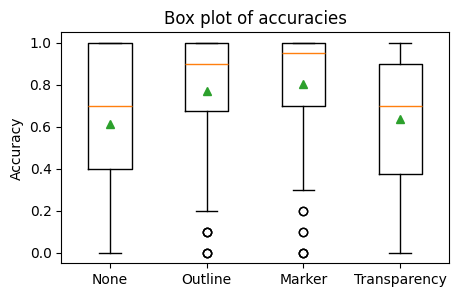

In [9]:
import matplotlib.pyplot as plt

def boxplot(data, dependent_var):
    samples = [data[data["highlight"] == c][dependent_var] for c in CONDITIONS]
    plt.figure(figsize=(5,3))
    plt.boxplot(samples, tick_labels=CONDITIONS, showmeans=True)
    plt.ylabel("Accuracy")
    plt.title("Box plot of accuracies")
    plt.show()

boxplot(scores, "accuracy")

Next, we do a pairwise comparison of the conditions using the Wilcoxon test. We apply a Bonferroni correction to the p-values.

In [10]:
from scipy.stats import wilcoxon
from itertools import combinations
import statsmodels.stats.multitest as smm

pairwise_results = []
for (c1, c2) in combinations(CONDITIONS, 2):
    sample1 = scores[scores["highlight"] == c1]["accuracy"]
    sample2 = scores[scores["highlight"] == c2]["accuracy"]
    statistic, p_value = wilcoxon(sample1, sample2)
    pairwise_results.append({"condition1": c1, "condition2": c2,
                             "statistic": statistic, "p_value": p_value})

p_values = [result["p_value"] for result in pairwise_results]

reject, pvals_corrected, _, _ = smm.multipletests(p_values, method='bonferroni')
for i in range(len(pvals_corrected)):
    pairwise_results[i]["p_corrected"] = pvals_corrected[i]
    pairwise_results[i]["reject"] = reject[i]

for r in pairwise_results:
    print(f"comparison: {r["condition1"]} vs {r["condition2"]}")
    print(f"statistic: {r["statistic"]}")
    print(f"uncorrected p-value: {r["p_value"]}")
    print(f"bonferroni corrected p-value: {r["p_corrected"]}")
    print(f"significant: {r["reject"]}")
    print()

comparison: None vs Outline
statistic: 845.0
uncorrected p-value: 0.008394336639373813
bonferroni corrected p-value: 0.05036601983624288
significant: False

comparison: None vs Marker
statistic: 533.5
uncorrected p-value: 0.0002544821187362054
bonferroni corrected p-value: 0.0015268927124172322
significant: True

comparison: None vs Transparency
statistic: 1249.5
uncorrected p-value: 0.5781839485511293
bonferroni corrected p-value: 1.0
significant: False

comparison: Outline vs Marker
statistic: 940.5
uncorrected p-value: 0.5048685158527701
bonferroni corrected p-value: 1.0
significant: False

comparison: Outline vs Transparency
statistic: 879.0
uncorrected p-value: 0.006067478023444668
bonferroni corrected p-value: 0.03640486814066801
significant: True

comparison: Marker vs Transparency
statistic: 615.5
uncorrected p-value: 0.0006465731081772548
bonferroni corrected p-value: 0.003879438649063529
significant: True



## Hypothesis 2

In this section, we will test the following hypothesis.

> **H2:** There is a difference in the time to task completion (TTC) of classifying objects as virtual or real when using an outline, a floating marker, translucency or nothing as visual cues for virtual objects.

First, we need to reshape the wide-format `data` into a long-format table containing the TTC, together with the condition from `latin_square`.

In [11]:
def get_ttc_by_highlight(data, latin_square):
    value_vars = ["time%d" % (i+1) for i in range(NUM_CONDITIONS)]
    ttc = data.melt(id_vars=["id", "group"], value_vars=value_vars,
                    value_name="ttc")
    ttc["experiment"] = ttc["variable"].str.extract(r"time(\d)")
    ttc["experiment"] = ttc["experiment"].astype(int)
    ttc = pd.merge(ttc, latin_square, on=["group", "experiment"])
    ttc = ttc.drop(columns=["variable", "experiment", "group"])
    return ttc

ttc = get_ttc_by_highlight(data, latin_square)
ttc

id    ttc     highlight
0    1  37.04          None
1    2  19.33       Outline
2    3  29.87        Marker
3    4  23.73  Transparency
4    5  29.98          None
..  ..    ...           ...
75  16  38.23       Outline
76  17  13.25        Marker
77  18  36.78  Transparency
78  19  22.72          None
79  20  11.54       Outline

[80 rows x 3 columns]

Now, we perform a Shapiro-Wilk test to find out whether we can assume normality of our data.

In [12]:
shapiro_all_conditions(ttc, "ttc")

Shapiro-Wilk test for 'ttc'
- Condition 'None':
  p = 0.0017695775063954811
- Condition 'Outline':
  p = 0.010942524724549
- Condition 'Marker':
  p = 7.774264813184632e-05
- Condition 'Transparency':
  p = 4.444353330411565e-05


Since we get p-values below 0.05, we can not assume normality and need to perform a non-parametric test. We are going to use the Friedman test.

In [13]:
friedman(ttc, "ttc")

Friedman test for 'ttc'
- Q = 0.30000000000001137
- p = 0.9600284803068755


The Friedman test does not give us a significant result, so we reject H2.

## Hypothesis 3

In this section, we will test the following hypothesis.

> **H2:** There is a difference in the participants' reported ease of classifying objects as virtual or real, as measured by the single ease question (SEQ), when using an outline, a floating marker, translucency or nothing as visual cues for virtual objects.

First, we need to reshape the wide-format `data` into a long-format table containing the SEQ, together with the condition from `latin_square`.

In [14]:
def get_seq_by_highlight(data, latin_square):
    value_vars = ["seq%d" % (i+1) for i in range(NUM_CONDITIONS)]
    seq = data.melt(id_vars=["id", "group"], value_vars=value_vars,
                    value_name="seq")
    seq["experiment"] = seq["variable"].str.extract(r"seq(\d)")
    seq["experiment"] = seq["experiment"].astype(int)
    seq = pd.merge(seq, latin_square, on=["group", "experiment"])
    seq = seq.drop(columns=["variable", "experiment", "group"])
    return seq

seq = get_seq_by_highlight(data, latin_square)
seq

id  seq     highlight
0    1    4          None
1    2    2       Outline
2    3    5        Marker
3    4    7  Transparency
4    5    2          None
..  ..  ...           ...
75  16    7       Outline
76  17    7        Marker
77  18    1  Transparency
78  19    1          None
79  20    7       Outline

[80 rows x 3 columns]

Now, we perform a Shapiro-Wilk test to find out whether we can assume normality of our data.

In [15]:
shapiro_all_conditions(seq, "seq")

Shapiro-Wilk test for 'seq'
- Condition 'None':
  p = 0.04265626210173927
- Condition 'Outline':
  p = 8.628040399778581e-05
- Condition 'Marker':
  p = 0.01054011352703979
- Condition 'Transparency':
  p = 0.1318758787486104


Since we get p-values below 0.05, we can not assume normality and need to perform a non-parametric test. We are going to use the Friedman test.

In [16]:
friedman(seq, "seq")

Friedman test for 'seq'
- Q = 5.950549450549411
- p = 0.1140410448402415


The Friedman test does not give us a significant result, so we reject H3.

## Hypothesis 4

In this section, we will test the following hypothesis.

> **H2:** There is a difference in participants’ sense of presence, whether using an outline, a floating marker, translucency or nothing as visual cues for virtual objects.

First, we need to reshape the wide-format `data` into a long-format table containing the SUS presence score, together with the condition from `latin_square`. The presence score is the number of answers which received a score of 6 or 7.

In [17]:
NUM_SUS_QUESTIONS = 6

def get_presence_by_highlight(data, latin_square):
    value_vars = ["presence%d" % (i+1) for i in range(NUM_CONDITIONS)]
    for (i, value) in enumerate(value_vars):
        data["presence%d" % (i + 1)] = \
            sum([data["p%d.%d" % (i + 1, j)] > 5
                 for j in range(1, NUM_SUS_QUESTIONS + 1)])
    presence = data.melt(id_vars=["id", "group"], value_vars=value_vars,
                         value_name="presence")
    presence["experiment"] = presence["variable"].str.extract(r"presence(\d)")
    presence["experiment"] = presence["experiment"].astype(int)
    presence = pd.merge(presence, latin_square, on=["group", "experiment"])
    presence = presence.drop(columns=["variable", "experiment", "group"])
    return presence

presence = get_presence_by_highlight(data, latin_square)
presence

id  presence     highlight
0    1         1          None
1    2         3       Outline
2    3         0        Marker
3    4         1  Transparency
4    5         1          None
..  ..       ...           ...
75  16         0       Outline
76  17         0        Marker
77  18         0  Transparency
78  19         1          None
79  20         0       Outline

[80 rows x 3 columns]

Now, we perform a Shapiro-Wilk test to find out whether we can assume normality of our data.

In [18]:
shapiro_all_conditions(presence, "presence")

Shapiro-Wilk test for 'presence'
- Condition 'None':
  p = 0.05332720139133371
- Condition 'Outline':
  p = 0.007817104971425874
- Condition 'Marker':
  p = 0.004853725009476171
- Condition 'Transparency':
  p = 0.023598771142140325


Since we get p-values below 0.05, we can not assume normality and need to perform a non-parametric test. We are going to use the Friedman test.

In [19]:
friedman(presence, "presence")

Friedman test for 'presence'
- Q = 5.571428571428589
- p = 0.13442827156224355


The Friedman test does not give us a significant result, so we reject H4.